# 01: data exploration

this notebook explores the cifar-10 dataset, visualizes samples, and analyzes class distributions.


In [1]:
import sys
sys.path.append('../src')

import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from src.config import Config
from src.datasets import get_cifar10_loaders, get_cifar10_classes
from src.utils import plot_class_distribution, set_seed

set_seed(42)
config = Config()
print(f"device: {config.device}")
print(f"batch size: {config.batch_size}")

device: cuda
batch size: 128


## load cifar-10 dataset


In [2]:
train_loader, val_loader, test_loader = get_cifar10_loaders(config)
classes = get_cifar10_classes()
print(f"training samples: {len(train_loader.dataset)}")
print(f"validation samples: {len(val_loader.dataset)}")
print(f"test samples: {len(test_loader.dataset)}")
print(f"classes: {classes}")

training samples: 40000
validation samples: 10000
test samples: 10000
classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## visualize sample images


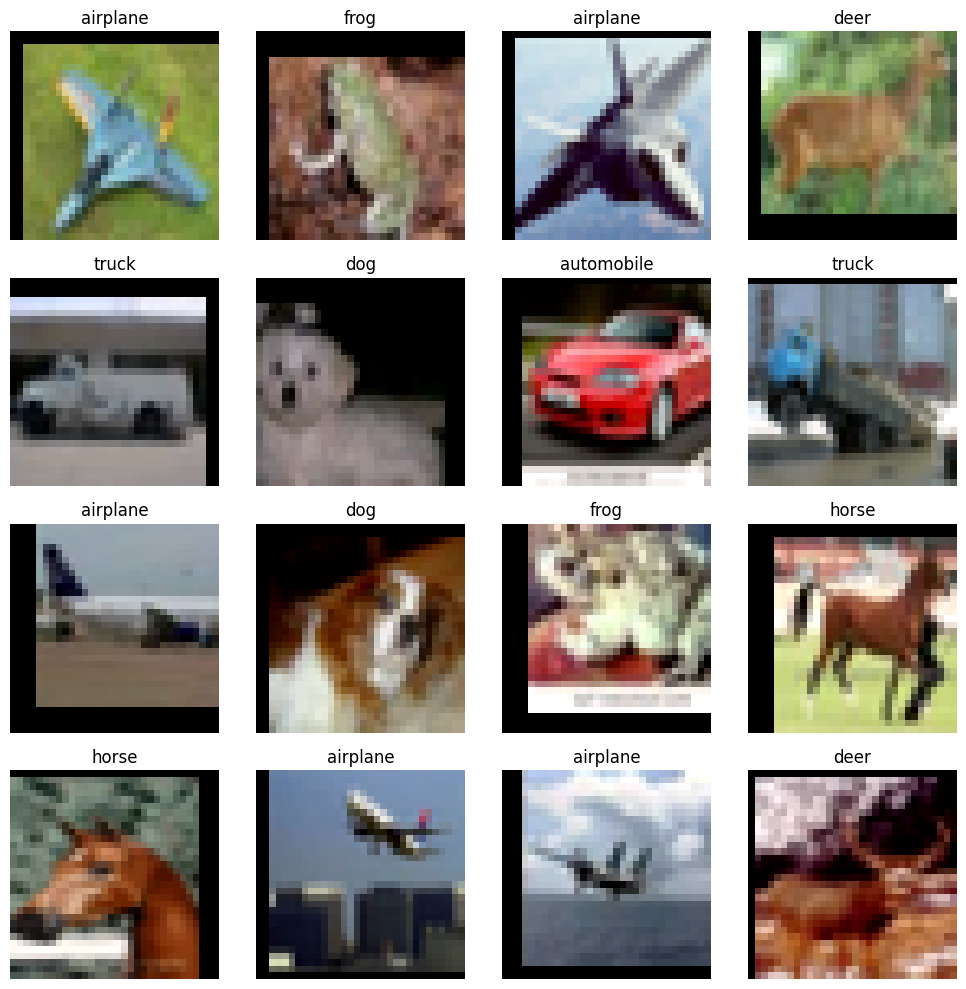

In [3]:
def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """denormalize tensor for visualization"""
    tensor = tensor.clone()
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return torch.clamp(tensor, 0, 1)

def show_samples(loader, num_samples=16):
    """display sample images from dataset"""
    dataiter = iter(loader)
    images, labels = next(dataiter)
    
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    axes = axes.ravel()
    
    for i in range(num_samples):
        img = denormalize(images[i])
        img = img.permute(1, 2, 0)
        axes[i].imshow(img)
        axes[i].set_title(classes[labels[i]])
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

show_samples(train_loader)


## analyze class distribution


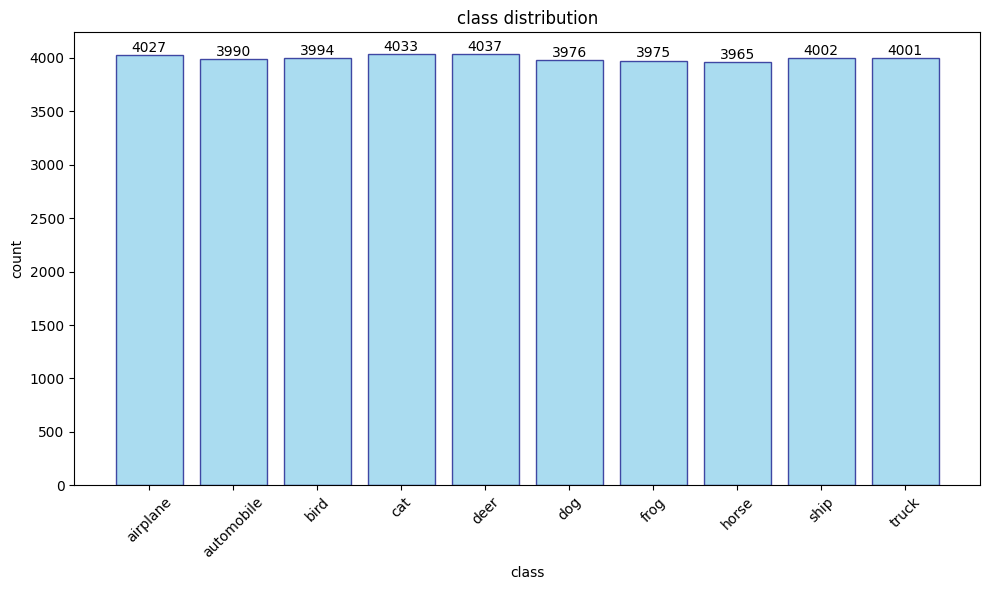

In [4]:
all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.numpy())

plot_class_distribution(all_labels, classes)


## dataset statistics


In [5]:
def calculate_stats(loader):
    mean = torch.zeros(3)
    std = torch.zeros(3)
    total_samples = 0
    
    for images, _ in loader:
        batch_samples = images.size(0)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_samples += batch_samples
    
    mean /= total_samples
    std /= total_samples
    return mean, std

mean, std = calculate_stats(train_loader)
print(f"dataset mean: {mean}")
print(f"dataset std: {std}")
print(f"image shape: {next(iter(train_loader))[0][0].shape}")
print(f"data type: {next(iter(train_loader))[0].dtype}")

dataset mean: tensor([-0.3296, -0.3368, -0.3098])
dataset std: tensor([1.2543, 1.2488, 1.2044])
image shape: torch.Size([3, 32, 32])
data type: torch.float32
